In [22]:
import pandas as pd
import numpy as np

In [23]:
# read data from previsouly downloaded csv file
# columns = ["mean", "std", "max", "min", "r","vol", "fd"]
AUDUSD_df = pd.read_csv('AUDUSD.csv',index_col=0)
EURUSD_df = pd.read_csv('EURUSD.csv',index_col=0)
GBPEUR_df = pd.read_csv('GBPEUR.csv',index_col=0)
USDCAD_df = pd.read_csv('USDCAD.csv',index_col=0)
USDRUB_df = pd.read_csv('USDRUB.csv',index_col=0)
USDCZK_df = pd.read_csv('USDCZK.csv',index_col=0)
USDINR_df = pd.read_csv('USDINR.csv',index_col=0)
USDJPY_df = pd.read_csv('USDJPY.csv',index_col=0)
USDMXN_df = pd.read_csv('USDMXN.csv',index_col=0)
USDPLN_df = pd.read_csv('USDPLN.csv',index_col=0)

In [24]:
# match the currency pairs and data frame
currency_pairs_dict = {"AUDUSD": AUDUSD_df, "EURUSD": EURUSD_df, "GBPEUR": GBPEUR_df, "USDCAD": USDCAD_df,
                       "USDRUB": USDRUB_df, "USDCZK": USDCZK_df, "USDINR": USDINR_df, "USDJPY": USDJPY_df,
                       "USDMXN": USDMXN_df, "USDPLN": USDPLN_df}

In [25]:
AUDUSD_df

,mean,max,min,r,std,vol,fd
0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1,0.000101,0.000101,0.000101,0.000101,0.000000,0.000000,0.000000
2,0.000208,0.000368,0.000047,0.000315,0.000107,0.000321,0.000053
3,0.000012,0.000447,-0.000423,-0.000379,0.000290,0.000870,0.000132
4,0.000078,0.000492,-0.000336,0.000275,0.000276,0.000827,0.000168
...,...,...,...,...,...,...,...
234,-0.000053,0.000267,-0.000373,-0.000105,0.000213,0.000640,0.000228
235,-0.000061,0.000268,-0.000390,-0.000246,0.000219,0.000657,0.000227
236,0.000045,0.000346,-0.000256,0.000220,0.000201,0.000602,0.000220
237,-0.000011,0.000225,-0.000246,0.000021,0.000157,0.000470,0.000205


1. High VOL and high FD (top 33 data points);
2. Medium VOL and high FD (following 34 data points); and
3. Low VOL and high FD (lower 33 data points).

In [26]:
# classify the data by vol/FD
# set them as 1=low, 2=medium, 3=high
# first bar=top 33
# second bar=top=67
def classify(currency, original_df, column_name,first_bar=33, second_bar=67):
    df=original_df.copy(deep=True)
    # sort by vol
    df=df.sort_values(by=[column_name])
    # first_bar_dict[column_name]
    for i, row in df.iterrows():
        if i < first_bar:
            df.at[i,column_name] = 1
        elif i < second_bar:
            df.at[i,column_name] = 2
        else:
            df.at[i,column_name] = 3
    return df

In [27]:
formatted_currency_pairs_dict={}
# classify all the fds
for key, df in currency_pairs_dict.items():
    # classify by fd
    df=classify(key,df,"fd")
    # classify by vol
    df=classify(key,df,"vol")
    # show the results to check
    print(df)
    formatted_currency_pairs_dict[key]=df

         mean       max       min         r       std  vol   fd
0    0.000000  0.000000  0.000000       NaN  0.000000  1.0  1.0
1    0.000101  0.000101  0.000101  0.000101  0.000000  1.0  1.0
96  -0.000459 -0.000362 -0.000555 -0.000518  0.000064  3.0  3.0
26   0.000037  0.000140 -0.000066  0.000050  0.000069  1.0  1.0
38  -0.000051  0.000062 -0.000163 -0.000110  0.000075  2.0  2.0
..        ...       ...       ...       ...       ...  ...  ...
186  0.000166  0.001462 -0.001130  0.001813  0.000864  3.0  3.0
187  0.000291  0.001590 -0.001009  0.000558  0.000867  3.0  3.0
188  0.000482  0.001782 -0.000818  0.000867  0.000867  3.0  3.0
190  0.000437  0.001884 -0.001011  0.000064  0.000965  3.0  3.0
189  0.000408  0.001874 -0.001058 -0.001120  0.000978  3.0  3.0

[239 rows x 7 columns]
         mean       max       min         r       std  vol   fd
0    0.000000  0.000000  0.000000       NaN  0.000000  1.0  1.0
1    0.000055  0.000055  0.000055  0.000055  0.000000  1.0  1.0
26   0.000004  0

In [28]:
AUDUSD = formatted_currency_pairs_dict['AUDUSD']

In [29]:
AUDUSD

,mean,max,min,r,std,vol,fd
0,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.0
1,0.000101,0.000101,0.000101,0.000101,0.000000,1.0,1.0
96,-0.000459,-0.000362,-0.000555,-0.000518,0.000064,3.0,3.0
26,0.000037,0.000140,-0.000066,0.000050,0.000069,1.0,1.0
38,-0.000051,0.000062,-0.000163,-0.000110,0.000075,2.0,2.0
...,...,...,...,...,...,...,...
186,0.000166,0.001462,-0.001130,0.001813,0.000864,3.0,3.0
187,0.000291,0.001590,-0.001009,0.000558,0.000867,3.0,3.0
188,0.000482,0.001782,-0.000818,0.000867,0.000867,3.0,3.0
190,0.000437,0.001884,-0.001011,0.000064,0.000965,3.0,3.0



### The objective is to use the trained dataset from Day 1 to predict in real-time the next hour’s return on 
### Day 2 using VOL, FD, and MEAN (3 features). (Based on the classification of FD and VOL (from Day 1), 
### you should automatically replace them in real-time with 1, 2, or 3.)

# Train Models

In [30]:
!pip install pycaret

In [31]:
from pycaret import regression


In [32]:
def extract_features(df):
    df=df[["mean","fd","vol","r"]]
    return df

In [33]:
AUDUSD=extract_features(AUDUSD)

In [34]:
AUDUSD

,mean,fd,vol,r
0,0.000000,1.0,1.0,NaN
1,0.000101,1.0,1.0,0.000101
96,-0.000459,3.0,3.0,-0.000518
26,0.000037,1.0,1.0,0.000050
38,-0.000051,2.0,2.0,-0.000110
...,...,...,...,...
186,0.000166,3.0,3.0,0.001813
187,0.000291,3.0,3.0,0.000558
188,0.000482,3.0,3.0,0.000867
190,0.000437,3.0,3.0,0.000064


In [35]:
AUDUSD1 = regression.setup(data = AUDUSD, target = 'r')

,Description,Value
0,session_id,961
1,Target,r
2,Original Data,"(239, 4)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(166, 2)"


In [36]:
best_model = regression.compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0002,0.0000,0.0003,0.2419,0.0003,1.8834,0.0050
br,Bayesian Ridge,0.0002,0.0000,0.0003,0.2343,0.0003,1.8926,0.0050
lr,Linear Regression,0.0002,0.0000,0.0003,0.2331,0.0003,1.9437,0.3430
lar,Least Angle Regression,0.0002,0.0000,0.0003,0.2328,0.0003,1.9433,0.0050
lightgbm,Light Gradient Boosting Machine,0.0002,0.0000,0.0003,0.1028,0.0003,2.3979,0.0970
huber,Huber Regressor,0.0003,0.0000,0.0003,0.0703,0.0003,1.4122,0.0070
par,Passive Aggressive Regressor,0.0003,0.0000,0.0004,-0.0610,0.0004,1.0000,0.0050
ridge,Ridge Regression,0.0003,0.0000,0.0004,-0.0720,0.0003,1.2388,0.0050
en,Elastic Net,0.0003,0.0000,0.0004,-0.0743,0.0004,1.1986,0.0050
llar,Lasso Least Angle Regression,0.0003,0.0000,0.0004,-0.0743,0.0004,1.1986,0.0050


In [37]:
regression.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
# train model for all currency df
def train_regression_model(df, target):
    regression.setup(data=df,target='r',fold_shuffle=True)
    best=regression.compare_models()
    regression.evaluate_model(best)
    return best

In [39]:
currency_model_dict={}
for curreny, df in formatted_currency_pairs_dict.items():
    # extract feature
    df=extract_features(df)
    currency_model_dict[curreny]=train_regression_model(df,'r')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:33:45
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
mean,Numeric
fd,Numeric
vol,Numeric
r,Label


quit


SystemExit: Read the documentation of setup to learn how to overwrite data types over the inferred types. setup function must run again before you continue modeling.

In [40]:
def main_fun(path,file,thres):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import ensemble
    ''' 
    import data
    '''
    df = pd.read_csv('AUDUSD.csv',index_col='Unnamed: 0')
    df = df.dropna()
    feature = ['mean','max','min','std','vol','fd']
    label = ['r']
    
    '''
    train model
    '''
    n = int(len(df)/2)
    train_X = df[:n][feature].values
    train_y = df[:n][label].values.reshape(-1,)
    test_X = df[n:][feature].values
    test_y = df[n:][label].values.reshape(-1,)

    rf = ensemble.RandomForestRegressor(random_state=0)  
    rf.fit(train_X,train_y)
    pre_y = rf.predict(test_X)

    '''
    init test
    '''
    benchmark = test_y[1:]  #bechmark: the return of hold it as long
    open_order = 0  #initial
    cash = 1  #initial cash
    caplist = [cash]  #cash list
    location = {}  # position
    location['long_short'] = 0
    location['value'] = 0
    ape_list = []

    for i in range(1,pre_y.shape[0]):
        '''
        fecth data of the day
        '''
        true_prevalue = test_y[i-1]  #T-1 real return, which is also the actual return of the current section
        predict_prevalue = pre_y[i-1] #T-1 prediction return
        ape = abs((true_prevalue - predict_prevalue) / true_prevalue)  #abs percentage error
        ape_list.append(ape)
        predict_value = pre_y[i]  #prediction

        '''
        update curr position yield
        '''
        if location['long_short'] != 0:
            pct = location['long_short'] * true_prevalue + 1
            location['value'] = location['value'] * pct
        else:
            pass


        '''
        strategy
        '''
        if (true_prevalue>0 and predict_prevalue>0) or (true_prevalue<0 and predict_prevalue<0):  #aligned
            if ape <= thres:  #less than thres
                if location['long_short']==1 and predict_value<0:  #currently long, neg pre,change to short
                    location['long_short'] = -1
                elif location['long_short']==-1 and predict_value>0:  #curr short, pos pre, change to long
                    location['long_short'] = 1
                elif location['long_short'] == 0:  #open position
                    if predict_value>0:
                        location['long_short'] = 1
                        location['value'] = cash
                        cash = 0
                    else:
                        location['long_short'] = -1
                        location['value'] = cash
                        cash = 0
                else:
                    pass

            else:      #greater than thres, no act
                pass

        else:   #diverge close posi
            if location['long_short'] != 0:
                location['long_short'] = 0
                cash = location['value']  #cash update
                location['value'] = 0  #
            else:
                pass


        '''
        update cash list
        '''
        caplist.append(location['value']+cash)
    
    '''
    test conclusion
    '''
    rdf = pd.DataFrame()
    rdf['true'] = test_y  #true 
    rdf['predict'] = pre_y  #pre
    rdf['benchmark'] = (rdf['true'] + 1).cumprod()  #keep long cash
    rdf['value'] = caplist  #cash
    rdf.loc[1:,'ape'] = ape_list 
    rdf['cummax'] = rdf['value'].cummax()
    rdf['drawdown'] = rdf['value'] / rdf['cummax'] - 1
    rdf['pct'] = rdf['value'] / rdf['value'].shift(1) - 1
    ret = list(rdf['value'])[-1] - 1  #yield
    vol = rdf['pct'].std()  #volatility
    sharpe = rdf['pct'].mean() / rdf['pct'].std()
    max_dd = rdf['drawdown'].min() #largest single drawdown
    mdf = pd.DataFrame([ret,vol,sharpe,max_dd])
    mdf = mdf.T
    mdf.index.name = ''
    mdf.columns = ['Ret','Vol','Sharpe','MaxDrawdown']
    
    return rdf,mdf


In [41]:

def plot(rdf,xsize):
    '''
    observable func
    '''
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime
    x = rdf.index
    b = x[0]
    e = x[-1]
    x = rdf.index
    fig = plt.figure(figsize=(xsize,xsize/2))
    '''
    net value curve
    '''
    ax1 = plt.subplot(2,1,1)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    y1 = rdf['value'] - 1
    
    y2 = rdf['benchmark'] - 1
    l2,= plt.plot(x,y2,'#8B0000',alpha=0.7)

    plt.fill_between(x,0,y1,facecolor='#1E90FF', alpha=0.1) #area
    l1,= plt.plot(x,y1,color='#483D8B',alpha=0.9)
    plt.plot(x,[0]*len(rdf),'k-',alpha=1)
    
    plt.legend([l1,l2],['Value','BenchMark'],fontsize=xsize/1.2,loc='upper left')

    plt.yticks(fontsize=xsize/1.5)
    plt.ylabel('Return',fontsize=xsize)

    plt.xlim(x[0],x[-1])
    plt.grid(True)

    '''
    test curve
    '''
    ax2 = plt.subplot(2,1,2,sharex=ax1)
    plt.setp(ax1.get_xticklabels(),visible=False)
    plt.subplots_adjust(wspace=0,hspace=0)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    y3 = rdf['drawdown']
    plt.fill_between(x,0,y3,facecolor='blue', alpha=0.5)
    plt.plot(x,[0]*len(rdf),'k-',alpha=1)
    plt.yticks(fontsize=xsize/1.5)
    plt.ylabel('Drawdown',fontsize=xsize)
    plt.grid(True)

    
    plt.xticks(fontsize=xsize)
    
    return fig

,Ret,Vol,Sharpe,MaxDrawdown
,,,,
0,0.004805,0.000344,0.11813,-0.003147


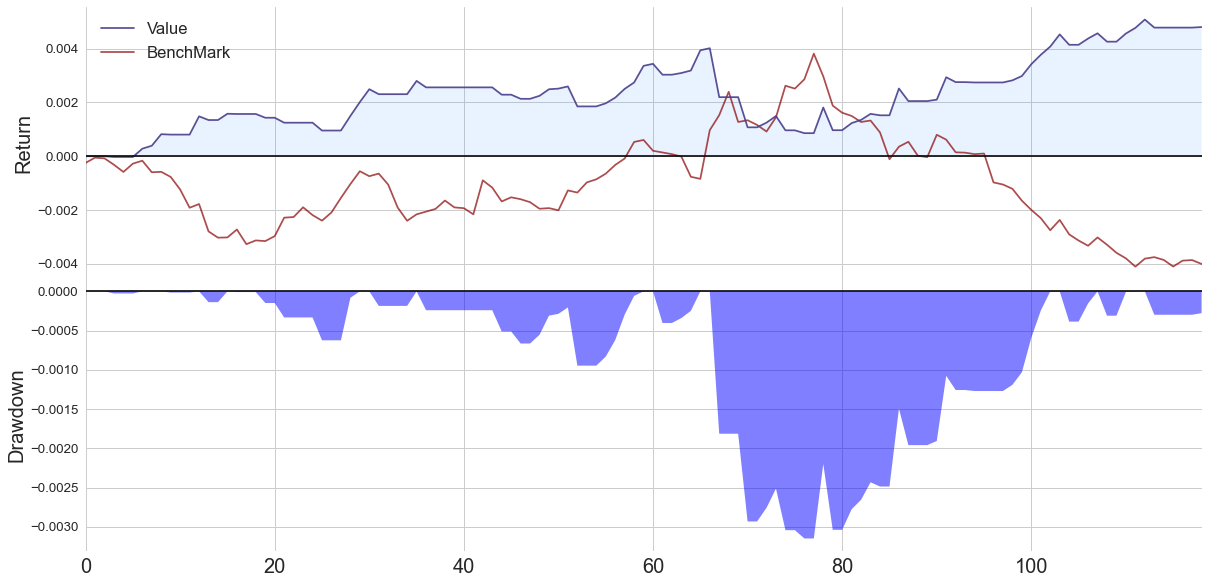

In [42]:
path = '/home/xychen/download/RF/'
file = 'AUDUSD.csv'
thres = 1  #percentage error abs(true_value - predict_value) / abs(true_value)
rdf,mdf = main_fun(path,file,thres)
fig = plot(rdf,20)
'''
ret:tot return
vol
sharpe
maxdrawdown
'''
mdf

In [43]:
'''
test result:
    true:true return
    predict
    benchmark:long position yield
    value:startegy val
    ape:abs percentage error
    cummax:cumulative max
    drawdown
    pct:strategy daily yield
'''
rdf

,true,predict,benchmark,value,ape,cummax,drawdown,pct
0,-0.000247,0.000148,0.999753,1.000000,NaN,1.000000,0.000000,NaN
1,0.000196,0.000205,0.999948,1.000000,1.599364,1.000000,0.000000,0.000000
2,-0.000027,0.000088,0.999921,1.000000,0.049402,1.000000,0.000000,0.000000
3,-0.000237,0.000004,0.999684,0.999973,4.259903,1.000000,-0.000027,-0.000027
4,-0.000267,-0.000016,0.999417,0.999973,1.015037,1.000000,-0.000027,0.000000
...,...,...,...,...,...,...,...,...
114,-0.000105,0.000047,0.996143,1.004785,4.416512,1.005084,-0.000298,0.000000
115,-0.000246,0.000108,0.995899,1.004785,1.451453,1.005084,-0.000298,0.000000
116,0.000220,0.000100,0.996118,1.004785,1.439220,1.005084,-0.000298,0.000000
117,0.000021,0.000072,0.996138,1.004785,0.546092,1.005084,-0.000298,0.000000
